In [1]:
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px

from IPython.core.display import display, HTML
display(HTML(""))

import pandas as pd
import numpy as np
import urllib.request, json 
import requests

import plotly
import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html

import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/var/folders/72/2fftl9_10svdrxq3k6l5rmdc0000gn/T/ipykernel_41290/495413075.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


/var/folders/72/2fftl9_10svdrxq3k6l5rmdc0000gn/T/ipykernel_41290/495413075.py:23: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/72/2fftl9_10svdrxq3k6l5rmdc0000gn/T/ipykernel_41290/495413075.py:24: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
path = r'/Users/usmanmalik/Downloads/AD Project /seattle/s3_files/seattle' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))

seattle_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:
seattle_df

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified,survey_id,country,city,bathrooms,location
0,6658052,1623580.0,Entire home/apt,NaN,Belltown,29,5.0,3.0,1.0,149.0,2.0,47.617936,-122.338395,2015-12-15 22:53:53.463279,NaN,NaN,NaN,NaN,NaN
1,5487934,13546801.0,Private room,NaN,East Queen Anne,2,5.0,2.0,1.0,150.0,1.0,47.638999,-122.343574,2015-12-15 22:53:51.795179,NaN,NaN,NaN,NaN,NaN
2,7915432,26389600.0,Shared room,NaN,University District,1,4.0,2.0,1.0,40.0,1.0,47.663532,-122.311492,2015-12-15 22:53:01.021586,NaN,NaN,NaN,NaN,NaN
3,3040278,14860162.0,Entire home/apt,NaN,Lower Queen Anne,156,5.0,4.0,2.0,217.0,2.0,47.621055,-122.357378,2015-12-15 22:52:42.700132,NaN,NaN,NaN,NaN,NaN
4,803902,4047435.0,Entire home/apt,NaN,Alki,7,5.0,NaN,3.0,250.0,3.0,47.576378,-122.408524,2015-12-15 22:52:40.443187,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113671,6939472,15984289.0,Private room,NaN,Mid-Beacon Hill,152,4.5,1.0,1.0,35.0,NaN,47.561087,-122.296161,2016-12-25 00:34:20.968210,NaN,NaN,NaN,NaN,NaN
113672,12572643,51110074.0,Private room,NaN,Atlantic,80,5.0,2.0,1.0,20.0,NaN,47.595673,-122.302001,2016-12-25 00:34:20.966046,NaN,NaN,NaN,NaN,NaN
113673,12159498,60119908.0,Private room,NaN,High Point,12,5.0,2.0,1.0,30.0,NaN,47.553436,-122.374924,2016-12-25 00:34:20.963987,NaN,NaN,NaN,NaN,NaN
113674,16027567,35161537.0,Private room,NaN,Stevens,10,4.5,1.0,1.0,30.0,NaN,47.619736,-122.301899,2016-12-25 00:34:20.961621,NaN,NaN,NaN,NaN,NaN


In [4]:
seattle_df.shape

(113676, 19)

In [5]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113676 entries, 0 to 113675
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   room_id               113676 non-null  int64  
 1   host_id               113667 non-null  float64
 2   room_type             113662 non-null  object 
 3   borough               0 non-null       float64
 4   neighborhood          113676 non-null  object 
 5   reviews               113676 non-null  int64  
 6   overall_satisfaction  98323 non-null   float64
 7   accommodates          109557 non-null  float64
 8   bedrooms              107956 non-null  float64
 9   price                 113676 non-null  float64
 10  minstay               60784 non-null   float64
 11  latitude              113676 non-null  float64
 12  longitude             113676 non-null  float64
 13  last_modified         113676 non-null  object 
 14  survey_id             24615 non-null   float64
 15  

# PART A: Data Cleaning

In [6]:
seattle_percent_missing = seattle_df.isnull().sum() * 100 / len(seattle_df)
missing_value_df = pd.DataFrame({'column_name': seattle_df.columns,
                                 'percent_missing': seattle_percent_missing})

missing_value_df

,column_name,percent_missing
room_id,room_id,0.000000
host_id,host_id,0.007917
room_type,room_type,0.012316
borough,borough,100.000000
neighborhood,neighborhood,0.000000
reviews,reviews,0.000000
overall_satisfaction,overall_satisfaction,13.505929
accommodates,accommodates,3.623456
bedrooms,bedrooms,5.031845
price,price,0.000000


# Removing rows in room_type & host_id which have nulls

In [7]:
# Since room_type & host_id have 0.00123% and 0.0079% of data missing, we're dropping these rows entirely
seattle_df = seattle_df[seattle_df['room_type'].notna()]

seattle_df = seattle_df[seattle_df['host_id'].notna()]

In [8]:
#Based on the above data, we are dropping columns: borough, bathrooms, location, city, survey_id
# borough, bathrooms, location, city, survey_id, 
# Impute country

seattle_df= seattle_df.drop(['borough', 'bathrooms', 'location', 'city', 'survey_id'], axis = 1)

In [9]:
seattle_df.reset_index(drop=True, inplace=True)

In [10]:
seattle_df.shape

(113662, 14)

### Imputation

In [11]:
seattle_df.price.describe()

count    113662.000000
mean        136.733728
std         147.139360
min           1.000000
25%          75.000000
50%         107.000000
75%         160.000000
max       10000.000000
Name: price, dtype: float64

In [12]:
seattle_df.reviews.describe()

count    113662.000000
mean         26.304922
std          42.409551
min           0.000000
25%           2.000000
50%          10.000000
75%          32.000000
max         645.000000
Name: reviews, dtype: float64

In [13]:
seattle_df['cat_price'] = pd.cut(seattle_df['price'], bins=[0, 9, 57,120, 180, 500, 1000, \
                                   2000, 4000, 6000, 8000, 10000, 12000], include_lowest=True, 
       labels=['[0-9]', '(9,57]', '(57-120]', '(120-180]', '(180-500]', '(500-1000]', '(1000-2000]',\
               '(2000-4000]', '(4000-6000]', '(6000-8000]', '(8000-10000]', '(10000-12000]'])

seattle_df['cat_reviews'] = pd.cut(seattle_df['reviews'], bins=[0, 1, 5,15, 18, 25, 50, \
                                   100, 200, 300, 400, 500, 600], include_lowest=True, 
       labels=['[0-1]', '(1,5]', '(5-15]', '(15-18]', '(18-25]', '(25-50]', '(50-100]',\
               '(100-200]', '(200-300]', '(300-400]', '(400-500]', '(500-600]'])

#### Country Column

In [14]:
seattle_df['country'] = seattle_df['country'].fillna('USA')

In [15]:
seattle_df.country

0         USA
1         USA
2         USA
3         USA
4         USA
         ... 
113657    USA
113658    USA
113659    USA
113660    USA
113661    USA
Name: country, Length: 113662, dtype: object

In [16]:
seattle_percent_missing = seattle_df.isnull().sum() * 100 / len(seattle_df)
missing_value_df = pd.DataFrame({'column_name': seattle_df.columns,
                                 'percent_missing': seattle_percent_missing})

missing_value_df

,column_name,percent_missing
room_id,room_id,0.000000
host_id,host_id,0.000000
room_type,room_type,0.000000
neighborhood,neighborhood,0.000000
reviews,reviews,0.000000
overall_satisfaction,overall_satisfaction,13.507593
accommodates,accommodates,3.611585
bedrooms,bedrooms,5.020147
price,price,0.000000
minstay,minstay,46.525664


### Minstay

- Minstay has 46.52% null values. Imputing with avg minstay value of that neighborhood.
- Wherevever minstay is null, we'll impute the mean of the minstay of that neighborhood in which the room belongs

In [17]:
seattle_df['minstay'] = seattle_df['minstay'].fillna(seattle_df.groupby(['room_type', 'bedrooms',\
                                                                              'cat_price'])['minstay'].transform('mean'))

### Bedroom

- bedrooms have 5% nulls.
- assuming no. of bedrooms depend on room type & neighborhood.
- taking avg. no. of bedrooms of these columns to impute.
- Grouping by 2 columns: neghborhood and room_type

In [18]:
# Grouping by 2 columns: neghborhood and room_type
seattle_df['bedrooms'] = seattle_df['bedrooms'].fillna(seattle_df.groupby(['room_type','neighborhood'])\
                                                       ['bedrooms'].transform('mean'))

### Overall Satisfaction

In [19]:
seattle_df['overall_satisfaction'] = seattle_df['overall_satisfaction'].fillna\
(seattle_df.groupby(['host_id','room_id', 'cat_reviews', 'cat_price'])['overall_satisfaction'].transform('mean'))

### Accomodates

In [20]:
seattle_df['accommodates'] = seattle_df['accommodates'].fillna\
(seattle_df.groupby(['room_id','room_type', 'neighborhood', 'bedrooms'])['accommodates'].transform('mean'))

**Now Calculating % of nulls in each column**

In [21]:
seattle_percent_missing = seattle_df.isnull().sum() * 100 / len(seattle_df)
missing_value_df = pd.DataFrame({'column_name': seattle_df.columns,
                                 'percent_missing': seattle_percent_missing})

missing_value_df

,column_name,percent_missing
room_id,room_id,0.000000
host_id,host_id,0.000000
room_type,room_type,0.000000
neighborhood,neighborhood,0.000000
reviews,reviews,0.000000
overall_satisfaction,overall_satisfaction,6.620506
accommodates,accommodates,0.349281
bedrooms,bedrooms,0.000000
price,price,0.000000
minstay,minstay,0.698562


### Removing Remaining rows with Nulls

In [22]:
seattle_df = seattle_df[seattle_df['overall_satisfaction'].notna()]

seattle_df = seattle_df[seattle_df['accommodates'].notna()]

seattle_df = seattle_df[seattle_df['minstay'].notna()]

### Verifying no nulls

In [23]:
seattle_percent_missing = seattle_df.isnull().sum() * 100 / len(seattle_df)
missing_value_df = pd.DataFrame({'column_name': seattle_df.columns,
                                 'percent_missing': seattle_percent_missing})

missing_value_df

,column_name,percent_missing
room_id,room_id,0.000000
host_id,host_id,0.000000
room_type,room_type,0.000000
neighborhood,neighborhood,0.000000
reviews,reviews,0.000000
overall_satisfaction,overall_satisfaction,0.000000
accommodates,accommodates,0.000000
bedrooms,bedrooms,0.000000
price,price,0.000000
minstay,minstay,0.000000


In [24]:
# #discretize price based on natural grouping
# seattle_df['cat_price'] = np.where((seattle_df['price'] <75) ,'low',
#                                 np.where((seattle_df['price'] >=75) & (seattle_df['price'] <=107),'Normal',
#                                np.where((seattle_df['price']>107) & (seattle_df['price'] <=160),'High',
#                                        'Very High')))

In [25]:
# #discretize reviews based on quartiles
# Q1=seattle_df['reviews'].quantile(0.25)
# Q2=seattle_df['reviews'].quantile(0.50)
# Q3=seattle_df['reviews'].quantile(0.75)
# IQR=Q3-Q1
# uw=Q3+1.5*IQR
# lw=Q1-1.5*IQR

# seattle_df["cat_reviews"]  = np.where((seattle_df['reviews']<lw) ,'less or no reviews',
#                                np.where((seattle_df['reviews'] >=lw) & (seattle_df['reviews'] <=Q1),'very less reviews',
#                                np.where((seattle_df['reviews']>Q1) & (seattle_df['reviews'] <=Q2),'low reviews',
#                                np.where((seattle_df['reviews']>Q2) & (seattle_df['reviews'] <=Q3),'sufficient reviews',
#                                np.where((seattle_df['reviews']>Q3) & (seattle_df['reviews'] <=Q3+1.5*IQR),'many reviews',
#                                'extraordinary number of reviews')))))

### Importing Json for Map

In [26]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [27]:
seattle_states = json.load(open("City_Clerk_Neighborhoods.geojson", "r"))

In [28]:
neighborhood_id_map = {}
for feature in seattle_states["features"]:
    feature["id"] = feature["properties"]["OBJECTID"]
    neighborhood_id_map[feature["properties"]["S_HOOD"]] = feature["id"]

In [29]:
seattle_states['features'][5]['properties']

{'OBJECTID': 6,
 'PERIMETER': 408.586,
 'S_HOOD': 'OOO',
 'L_HOOD': ' ',
 'L_HOODID': 0,
 'SYMBOL': 0,
 'SYMBOL2': 0,
 'AREA': 11371.064,
 'HOODS_': 8,
 'HOODS_ID': 0,
 'SHAPE_Length': 408.5865574336517,
 'SHAPE_Area': 11371.066635163774}

In [30]:
# Applying neighborhood ids in dataframe

seattle_df["id"] = seattle_df["neighborhood"].apply(lambda x: neighborhood_id_map[x])

In [31]:
# seattle_df.to_csv(r'/Users/usmanmalik/Desktop/seattle_updated_csv.csv', index=True, header=True)


In [32]:
seattle_df.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified,country,cat_price,cat_reviews,id
0,6658052,1623580.0,Entire home/apt,Belltown,29,5.0,3.0,1.0,149.0,2.0,47.617936,-122.338395,2015-12-15 22:53:53.463279,USA,(120-180],(25-50],60
1,5487934,13546801.0,Private room,East Queen Anne,2,5.0,2.0,1.0,150.0,1.0,47.638999,-122.343574,2015-12-15 22:53:51.795179,USA,(120-180],"(1,5]",43
2,7915432,26389600.0,Shared room,University District,1,4.0,2.0,1.0,40.0,1.0,47.663532,-122.311492,2015-12-15 22:53:01.021586,USA,"(9,57]",[0-1],42
3,3040278,14860162.0,Entire home/apt,Lower Queen Anne,156,5.0,4.0,2.0,217.0,2.0,47.621055,-122.357378,2015-12-15 22:52:42.700132,USA,(180-500],(100-200],45
4,803902,4047435.0,Entire home/apt,Alki,7,5.0,6.0,3.0,250.0,3.0,47.576378,-122.408524,2015-12-15 22:52:40.443187,USA,(180-500],(5-15],74


# PART C: Exploratory Data Analysis (EDA)

#### Inspecting prices

/Users/usmanmalik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/usmanmalik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



<AxesSubplot:xlabel='price', ylabel='Density'>

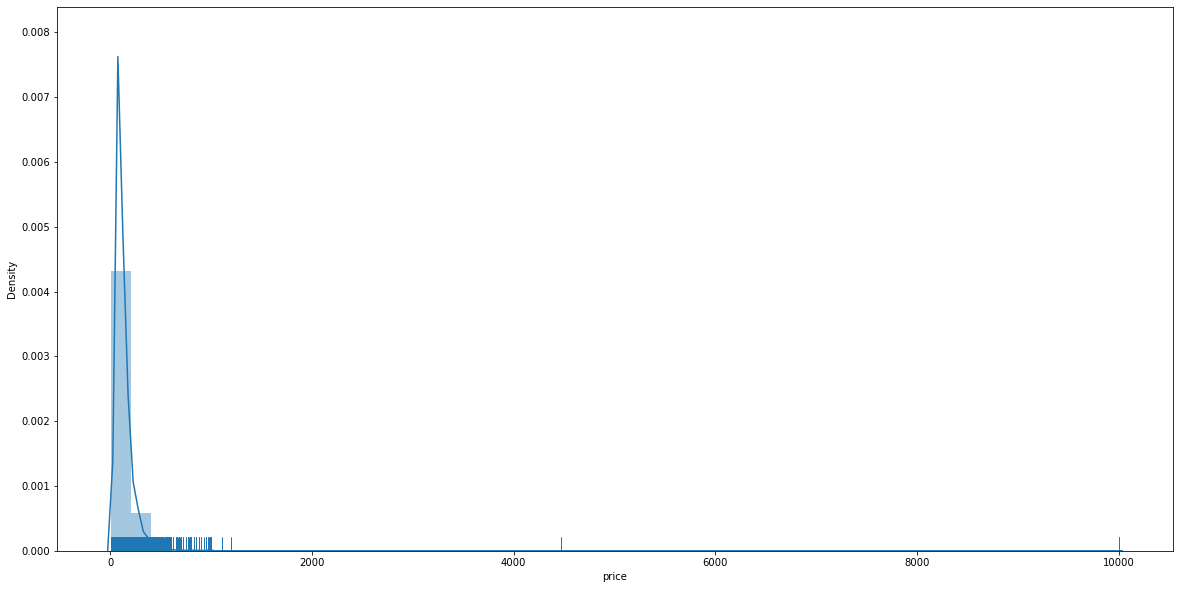

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(seattle_df['price'], rug=True)

#### How many different room types there are?

In [34]:
seattle_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

#### Which neighborhoods there are in Seattle Airbnb?

In [35]:
print(sorted(seattle_df['neighborhood'].unique()))

['Adams', 'Alki', 'Arbor Heights', 'Atlantic', 'Belltown', 'Bitter Lake', 'Briarcliff', 'Brighton', 'Broadview', 'Broadway', 'Bryant', 'Cedar Park', 'Central Business District', 'Columbia City', 'Crown Hill', 'Dunlap', 'East Queen Anne', 'Eastlake', 'Fairmount Park', 'Fauntleroy', 'First Hill', 'Fremont', 'Gatewood', 'Genesee', 'Georgetown', 'Green Lake', 'Greenwood', 'Haller Lake', 'Harbor Island', 'Harrison/Denny-Blaine', 'High Point', 'Highland Park', 'Holly Park', 'Industrial District', 'Interbay', 'International District', 'Laurelhurst', 'Lawton Park', 'Leschi', 'Lower Queen Anne', 'Loyal Heights', 'Madison Park', 'Madrona', 'Mann', 'Maple Leaf', 'Matthews Beach', 'Meadowbrook', 'Mid-Beacon Hill', 'Minor', 'Montlake', 'Mount Baker', 'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill', 'North College Park', 'North Delridge', 'North Queen Anne', 'Olympic Hills', 'Phinney Ridge', 'Pike-Market', 'Pinehurst', 'Pioneer Square', 'Portage Bay', 'Rainier Beach', 'Rainier View', 

#### Which room_type has higher prices?

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

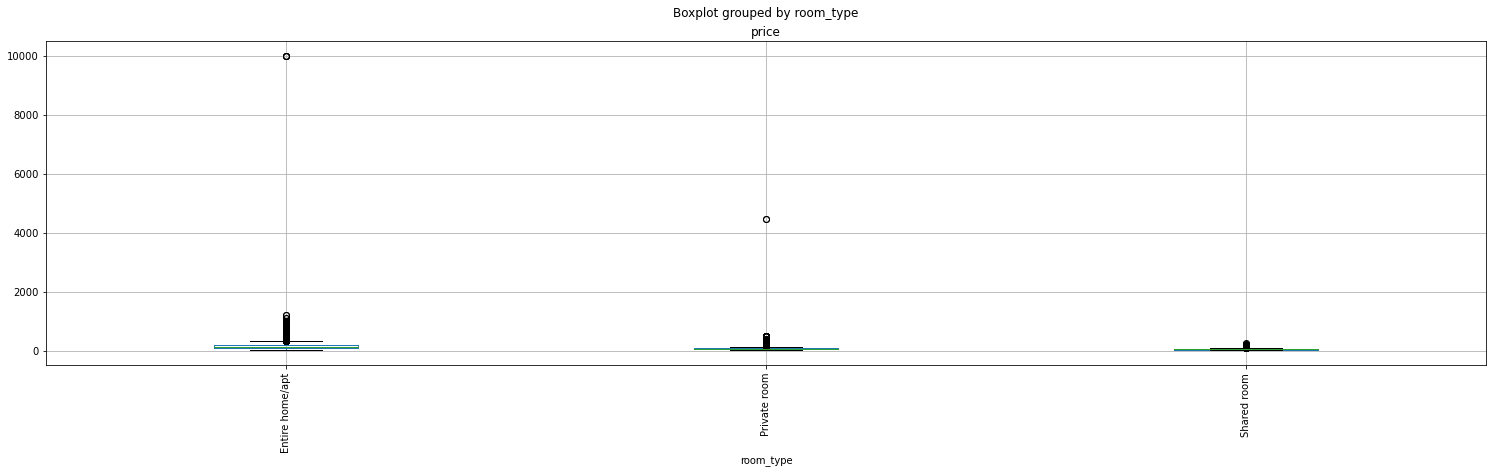

In [36]:
seattle_df.boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

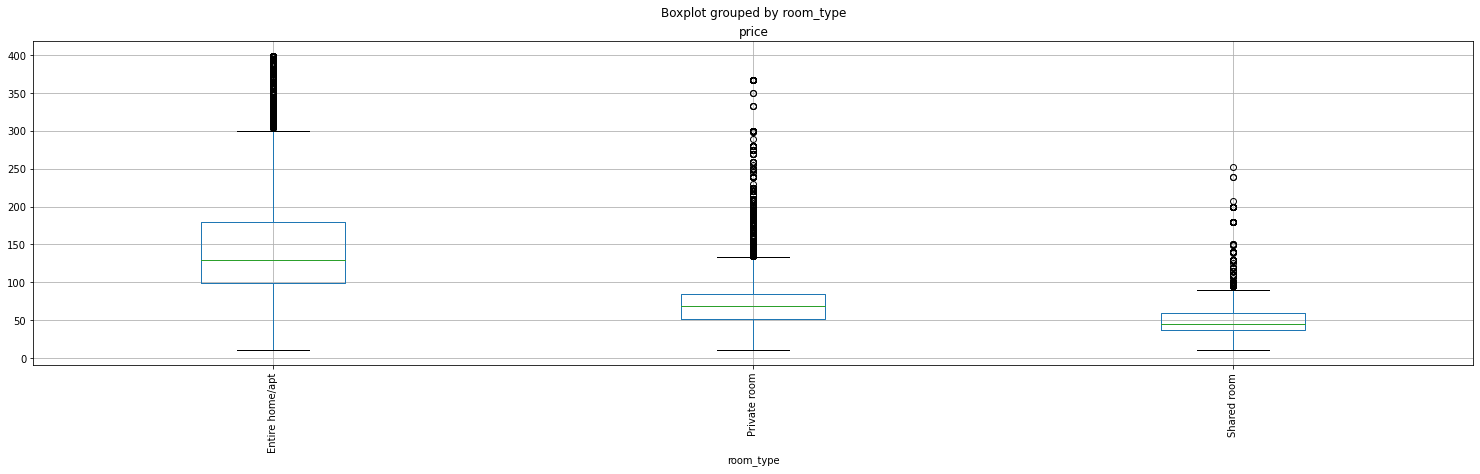

In [37]:
seattle_df[seattle_df['price']<400].boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

#### Which neighborhoods have higher prices?

<AxesSubplot:title={'center':'price'}, xlabel='neighborhood'>

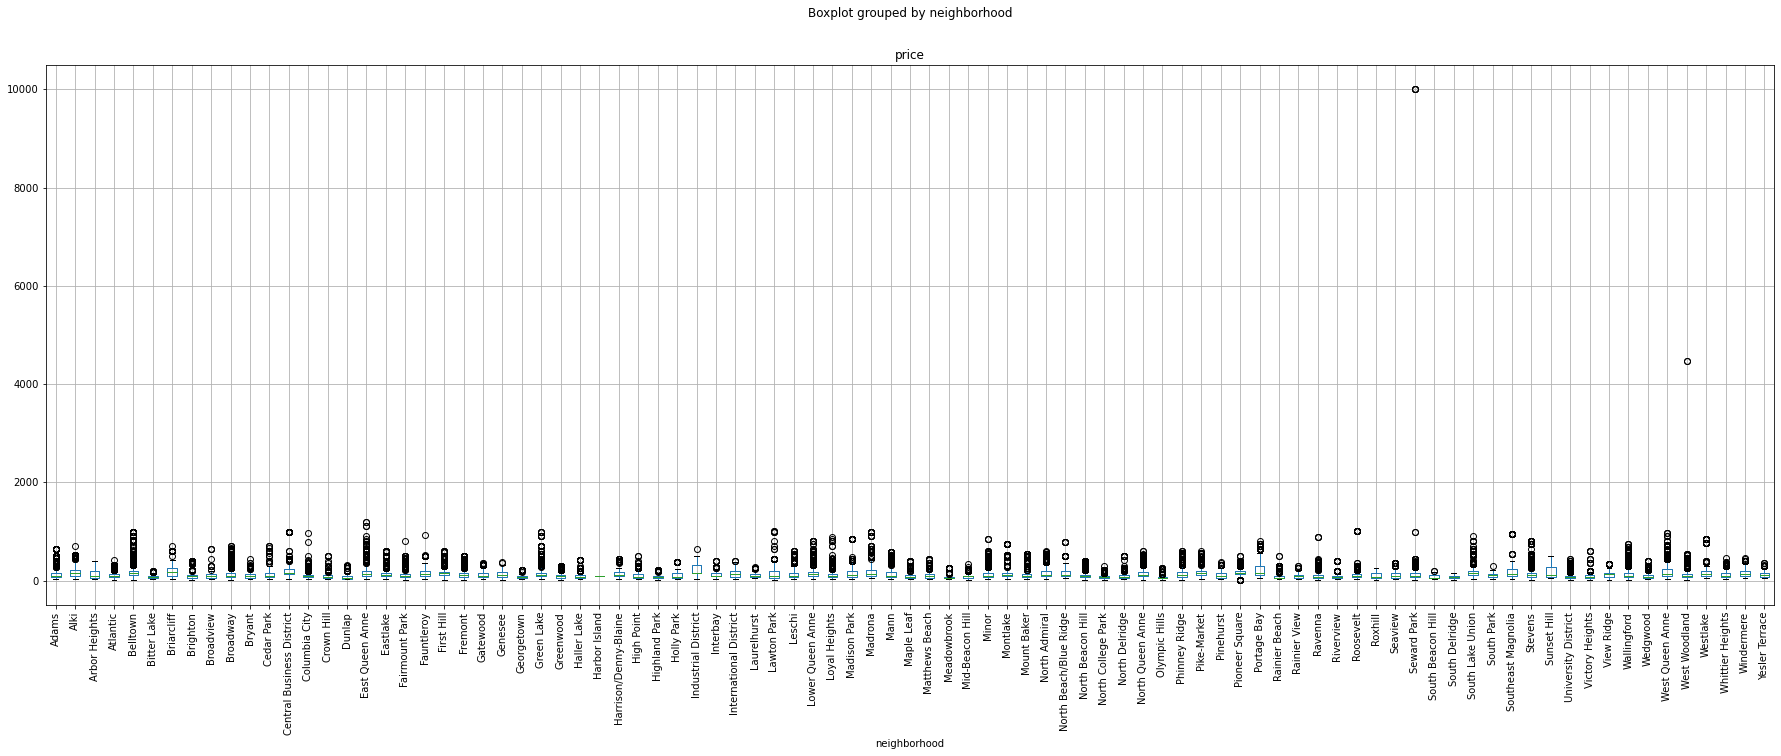

In [38]:
seattle_df.boxplot(column='price', by='neighborhood', figsize=(30,10), rot=90)

<AxesSubplot:title={'center':'price'}, xlabel='neighborhood'>

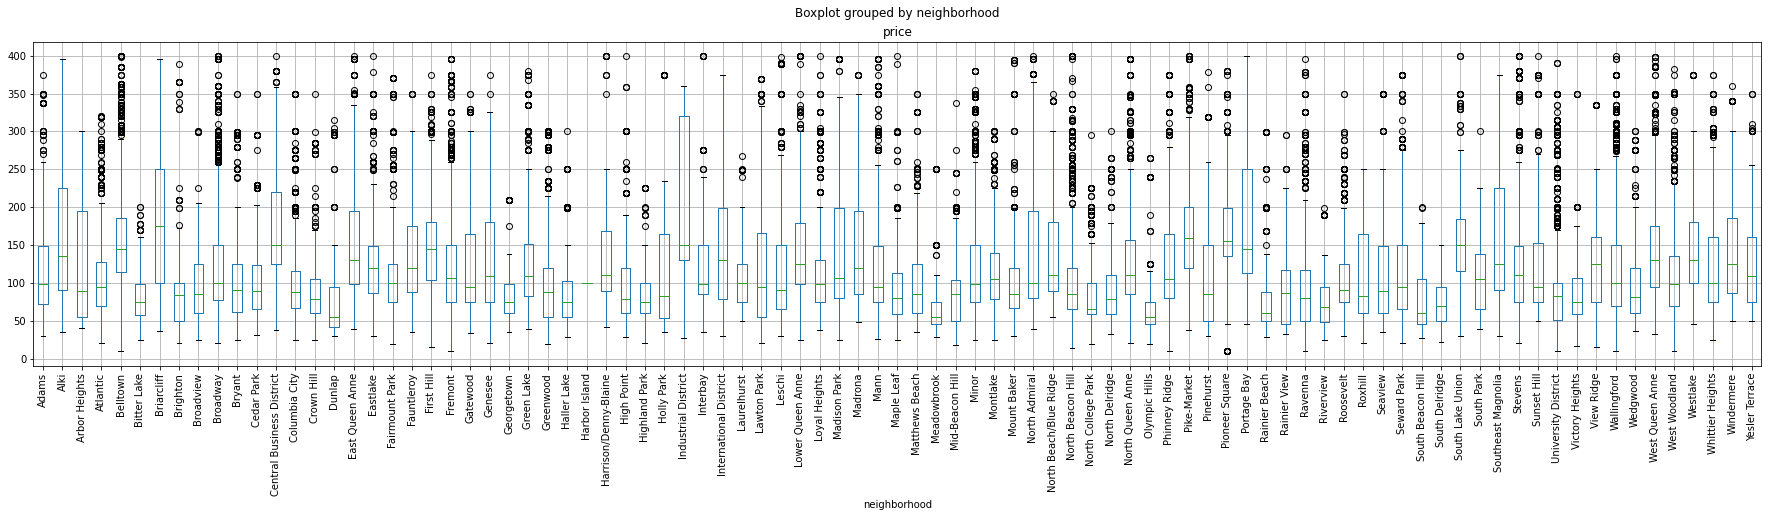

In [39]:
seattle_df[seattle_df['price']<400].boxplot(column='price', by='neighborhood', figsize=(30,6), rot=90)

#### Latitude & Longitude

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

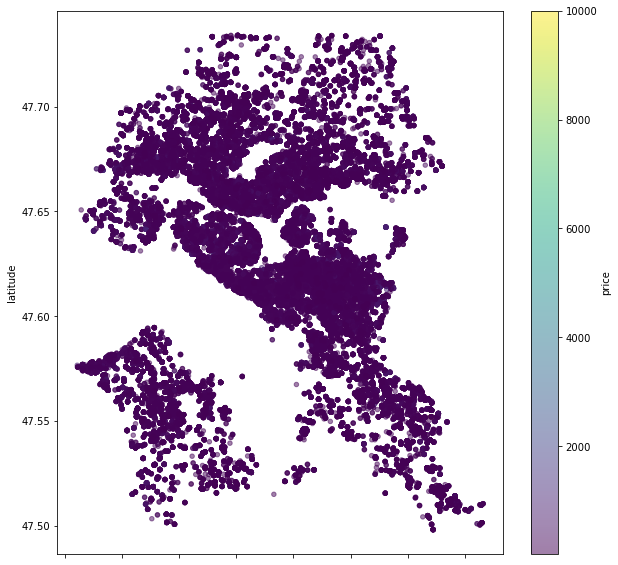

In [40]:
seattle_df.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='viridis', alpha=0.5)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

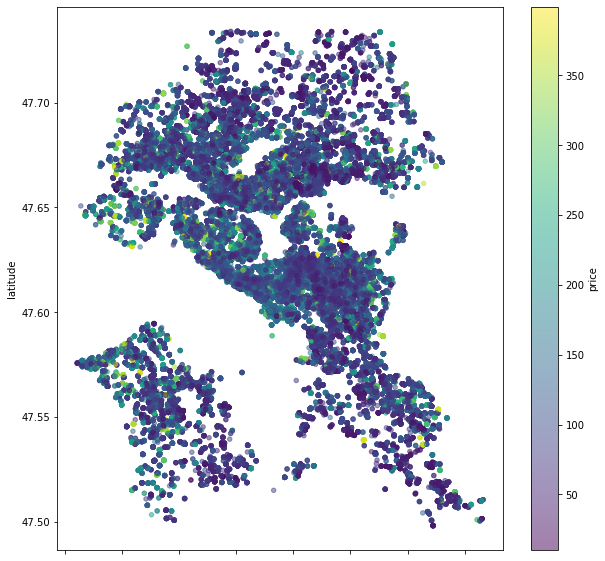

In [41]:
seattle_df[seattle_df['price']<400].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), \
                                                 cmap='viridis', alpha=0.5)


#### No. of Reviews

<AxesSubplot:xlabel='reviews', ylabel='price'>

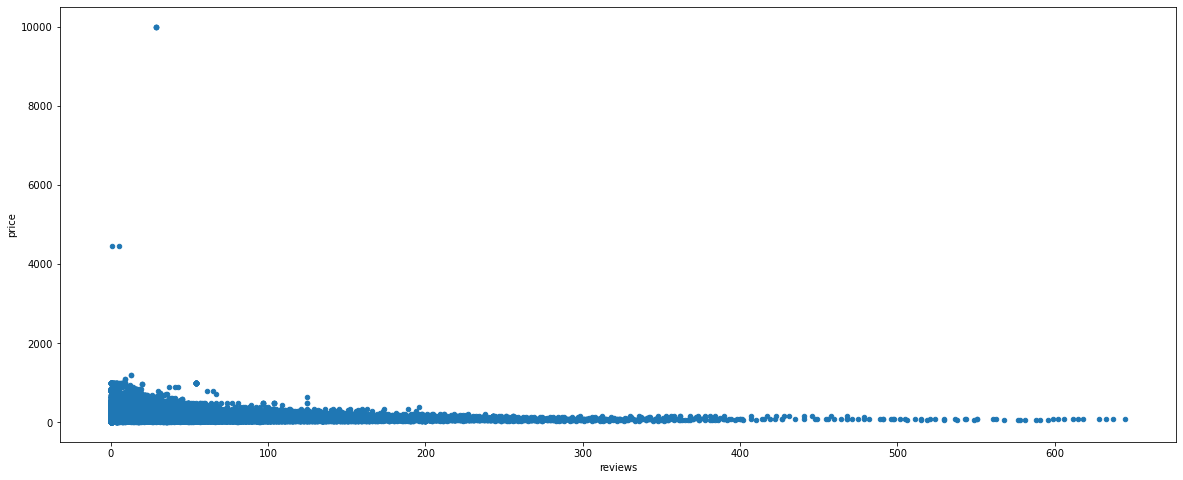

In [42]:
seattle_df.plot.scatter(x='reviews', y='price', figsize=(20,8))

#### Price vs log(reviews)

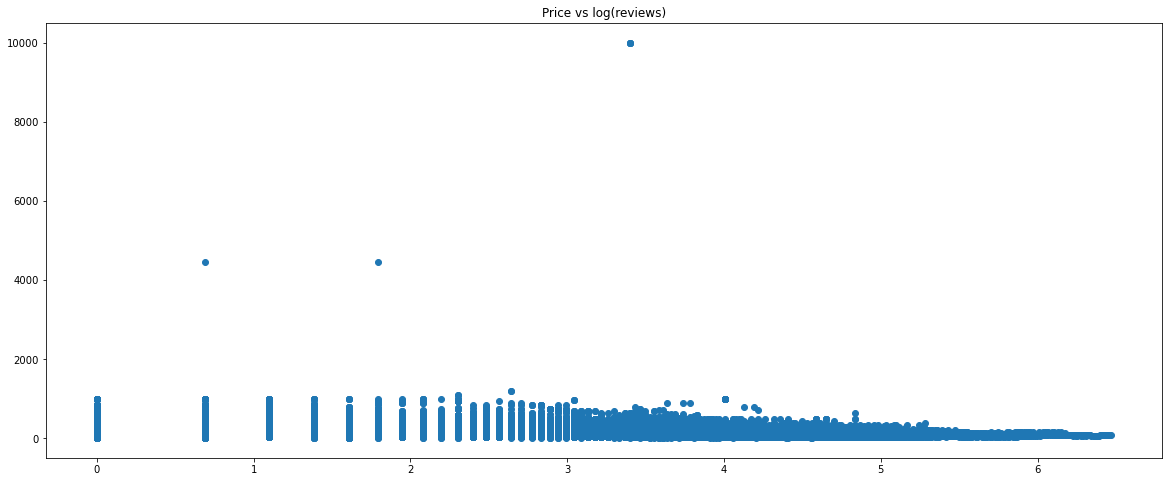

In [43]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+seattle_df['reviews']), seattle_df['price'])
plt.title('Price vs log(reviews)');

#### Satisfaction

<AxesSubplot:xlabel='overall_satisfaction', ylabel='price'>

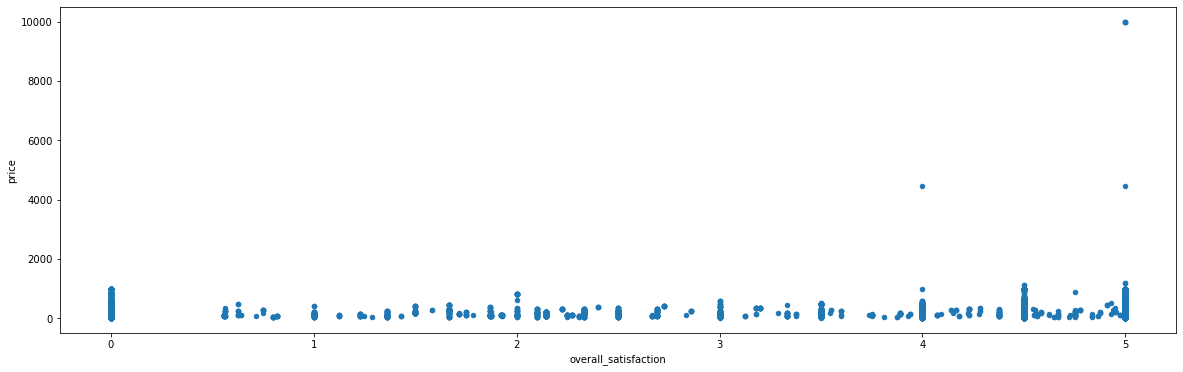

In [44]:
seattle_df.plot.scatter(x='overall_satisfaction', y='price', figsize=(20,6))

#### Bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

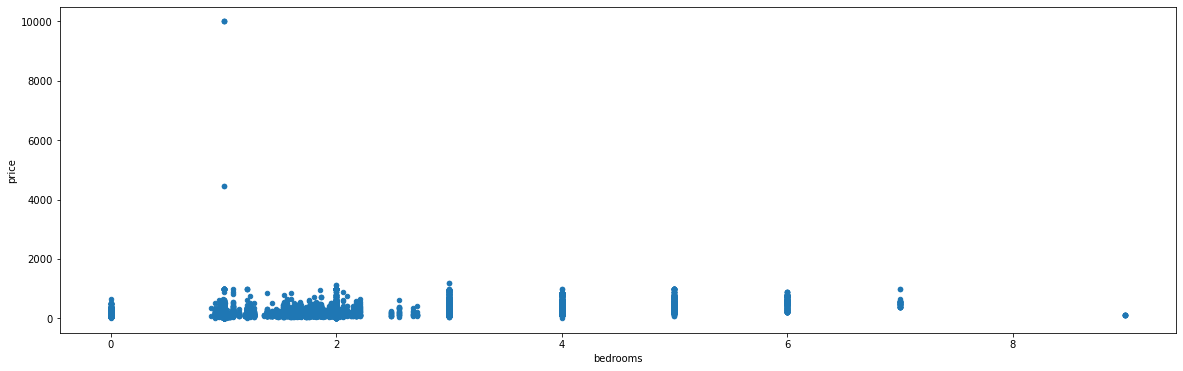

In [45]:
seattle_df.plot.scatter(x='bedrooms', y='price', figsize=(20,6))

#### Accomodates

<AxesSubplot:xlabel='accommodates', ylabel='price'>

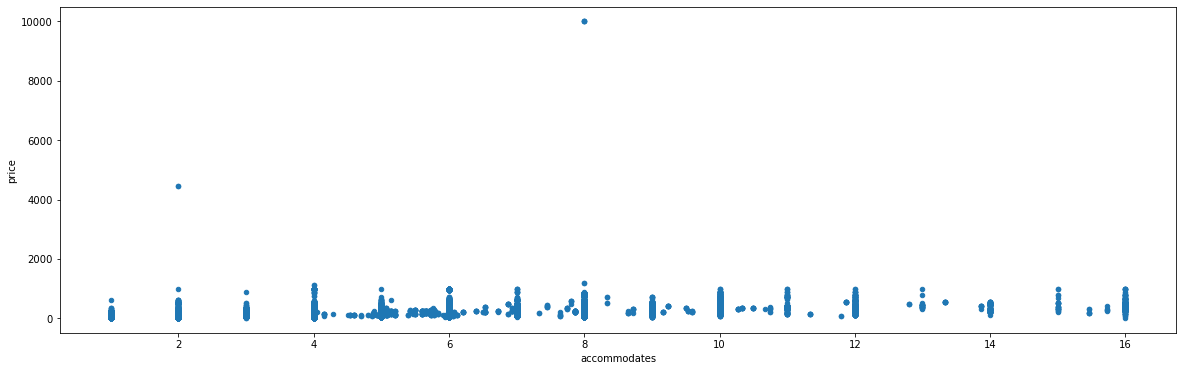

In [46]:
seattle_df.plot.scatter(x='accommodates', y='price', figsize=(20,6))

# PART D: Data Preprocessing

### i) Feature Engineering

In [47]:
# a new column named 'log_reviews' was made to make the magnitude of the reviews more closer to each other 
#for better visulaisation by negating any extreme values or outliers. 

seattle_df['logreviews'] = np.log(1 + seattle_df['reviews']) 

### ii) Assumptions

During this project we found out that properties with very few number of reviews are very difficult to predict. And we opted to fix the minimum number of reviews to 10 and similarly removed the outliers of price by fixing it to below 400.
- keeping only data of properties having:
       - minimum number of reviews = 10
       - price < 400

In [48]:
seattle_df = seattle_df[seattle_df['price'] <400]
seattle_df = seattle_df[seattle_df['reviews'] >10]

In [49]:
seattle_df.shape

(54671, 18)

### iii) Normalisation

In [50]:
seattle_df.dtypes

room_id                    int64
host_id                  float64
room_type                 object
neighborhood              object
reviews                    int64
overall_satisfaction     float64
accommodates             float64
bedrooms                 float64
price                    float64
minstay                  float64
latitude                 float64
longitude                float64
last_modified             object
country                   object
cat_price               category
cat_reviews             category
id                         int64
logreviews               float64
dtype: object

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
seattle_df['overall_satisfaction_norm']=scaler.fit_transform(seattle_df[['overall_satisfaction']]).round(2)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
seattle_df['price_norm']=scaler.fit_transform(seattle_df[['price']]).round(2)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
seattle_df['accommodates_norm']=scaler.fit_transform(seattle_df[['accommodates']]).round(2)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
seattle_df['bedrooms_norm']=scaler.fit_transform(seattle_df[['bedrooms']]).round(2)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
seattle_df['reviews_norm']=scaler.fit_transform(seattle_df[['reviews']]).round(2)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
seattle_df['minstay_norm']=scaler.fit_transform(seattle_df[['minstay']]).round(2)



In [52]:
seattle_df.reset_index(drop=True, inplace=True)

In [53]:
seattle_df

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,...,cat_price,cat_reviews,id,logreviews,overall_satisfaction_norm,price_norm,accommodates_norm,bedrooms_norm,reviews_norm,minstay_norm
0,6658052,1623580.0,Entire home/apt,Belltown,29,5.0,3.0,1.0,149.0,2.00000,...,(120-180],(25-50],60,3.401197,0.68,0.57,-0.15,-0.25,-0.43,-0.04
1,3040278,14860162.0,Entire home/apt,Lower Queen Anne,156,5.0,4.0,2.0,217.0,2.00000,...,(180-500],(100-200],45,5.056246,0.68,1.69,0.39,1.06,2.09,-0.04
2,2593176,8932486.0,Private room,Minor,66,4.5,3.0,1.0,70.0,2.00000,...,(57-120],(50-100],55,4.204693,-1.16,-0.72,-0.15,-0.25,0.30,-0.04
3,224763,8243075.0,Entire home/apt,Belltown,27,4.5,4.0,1.0,149.0,1.00000,...,(120-180],(25-50],60,3.332205,-1.16,0.57,0.39,-0.25,-0.47,-0.56
4,7201336,9730643.0,Private room,Roosevelt,13,4.5,1.0,1.0,55.0,1.72877,...,"(9,57]",(5-15],41,2.639057,-1.16,-0.96,-1.22,-0.25,-0.75,-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54666,14999955,75343272.0,Private room,Wallingford,28,5.0,2.0,1.0,30.0,1.72877,...,"(9,57]",(25-50],32,3.367296,0.68,-1.37,-0.69,-0.25,-0.45,-0.18
54667,6939472,15984289.0,Private room,Mid-Beacon Hill,152,4.5,1.0,1.0,35.0,1.72877,...,"(9,57]",(100-200],80,5.030438,-1.16,-1.29,-1.22,-0.25,2.01,-0.18
54668,12572643,51110074.0,Private room,Atlantic,80,5.0,2.0,1.0,20.0,1.72877,...,"(9,57]",(50-100],58,4.394449,0.68,-1.54,-0.69,-0.25,0.58,-0.18
54669,12159498,60119908.0,Private room,High Point,12,5.0,2.0,1.0,30.0,1.72877,...,"(9,57]",(5-15],92,2.564949,0.68,-1.37,-0.69,-0.25,-0.77,-0.18


### Applying One Hot Encoding

In [54]:
df_dummies = pd.get_dummies(seattle_df)
df_dummies.head()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,...,cat_reviews_(5-15],cat_reviews_(15-18],cat_reviews_(18-25],cat_reviews_(25-50],cat_reviews_(50-100],cat_reviews_(100-200],cat_reviews_(200-300],cat_reviews_(300-400],cat_reviews_(400-500],cat_reviews_(500-600]
0,6658052,1623580.0,29,5.0,3.0,1.0,149.0,2.00000,47.617936,-122.338395,...,0,0,0,1,0,0,0,0,0,0
1,3040278,14860162.0,156,5.0,4.0,2.0,217.0,2.00000,47.621055,-122.357378,...,0,0,0,0,0,1,0,0,0,0
2,2593176,8932486.0,66,4.5,3.0,1.0,70.0,2.00000,47.611111,-122.311962,...,0,0,0,0,1,0,0,0,0,0
3,224763,8243075.0,27,4.5,4.0,1.0,149.0,1.00000,47.613860,-122.348787,...,0,0,0,1,0,0,0,0,0,0
4,7201336,9730643.0,13,4.5,1.0,1.0,55.0,1.72877,47.677866,-122.320452,...,1,0,0,0,0,0,0,0,0,0


### Train and test split

In [55]:
X = df_dummies.copy().drop('price', axis = 1)
y = df_dummies['price'].copy()

In [56]:
#Split data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=1)

In [57]:
baseline = y_train.median() #median train
print('If we just take the median value, our baseline, we would say that an overnight stay in Seattle costs: ' + str(baseline))


If we just take the median value, our baseline, we would say that an overnight stay in Seattle costs: 99.0


In [58]:
y_train.value_counts(normalize= True)*100

100.0    3.512015
75.0     3.385736
99.0     3.350964
150.0    3.224685
95.0     3.155140
           ...   
393.0    0.001830
284.0    0.001830
294.0    0.001830
288.0    0.001830
382.0    0.001830
Name: price, Length: 311, dtype: float64

# PART E: Dashboard

In [59]:
seattle_df

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,...,cat_price,cat_reviews,id,logreviews,overall_satisfaction_norm,price_norm,accommodates_norm,bedrooms_norm,reviews_norm,minstay_norm
0,6658052,1623580.0,Entire home/apt,Belltown,29,5.0,3.0,1.0,149.0,2.00000,...,(120-180],(25-50],60,3.401197,0.68,0.57,-0.15,-0.25,-0.43,-0.04
1,3040278,14860162.0,Entire home/apt,Lower Queen Anne,156,5.0,4.0,2.0,217.0,2.00000,...,(180-500],(100-200],45,5.056246,0.68,1.69,0.39,1.06,2.09,-0.04
2,2593176,8932486.0,Private room,Minor,66,4.5,3.0,1.0,70.0,2.00000,...,(57-120],(50-100],55,4.204693,-1.16,-0.72,-0.15,-0.25,0.30,-0.04
3,224763,8243075.0,Entire home/apt,Belltown,27,4.5,4.0,1.0,149.0,1.00000,...,(120-180],(25-50],60,3.332205,-1.16,0.57,0.39,-0.25,-0.47,-0.56
4,7201336,9730643.0,Private room,Roosevelt,13,4.5,1.0,1.0,55.0,1.72877,...,"(9,57]",(5-15],41,2.639057,-1.16,-0.96,-1.22,-0.25,-0.75,-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54666,14999955,75343272.0,Private room,Wallingford,28,5.0,2.0,1.0,30.0,1.72877,...,"(9,57]",(25-50],32,3.367296,0.68,-1.37,-0.69,-0.25,-0.45,-0.18
54667,6939472,15984289.0,Private room,Mid-Beacon Hill,152,4.5,1.0,1.0,35.0,1.72877,...,"(9,57]",(100-200],80,5.030438,-1.16,-1.29,-1.22,-0.25,2.01,-0.18
54668,12572643,51110074.0,Private room,Atlantic,80,5.0,2.0,1.0,20.0,1.72877,...,"(9,57]",(50-100],58,4.394449,0.68,-1.54,-0.69,-0.25,0.58,-0.18
54669,12159498,60119908.0,Private room,High Point,12,5.0,2.0,1.0,30.0,1.72877,...,"(9,57]",(5-15],92,2.564949,0.68,-1.37,-0.69,-0.25,-0.77,-0.18


In [60]:
df3 = seattle_df.groupby('neighborhood')[['price', 'overall_satisfaction', 'minstay']].mean()
df3.reset_index(drop=False, inplace=True)

In [61]:
# removing outliers from minstay for accuracy
seattle_df = seattle_df[seattle_df['minstay'] < 5]

In [62]:
df3.head()

,neighborhood,price,overall_satisfaction,minstay
0,Adams,108.004338,4.900217,2.112052
1,Alki,129.657356,4.868715,1.970932
2,Arbor Heights,93.133333,4.986667,2.193695
3,Atlantic,106.490798,4.808589,1.814492
4,Belltown,145.527917,4.772230,2.147088


In [ ]:

# mapbox token
mapbox_accesstoken = 'pk.eyJ1Ijoic25tYWxpazk4IiwiYSI6ImNsYmNxY21zdDAycjczcHIzYTRuN3ZieGsifQ.At1mkb7HuF6rBLBkUIOk5w'

# This is the part to create plotly fig
########################################################
neighborhoods = seattle_df['neighborhood'].str.title().tolist()

pl_deep=[[0.0, 'rgb(253, 253, 204)'],
         [0.1, 'rgb(201, 235, 177)'],
         [0.2, 'rgb(145, 216, 163)'],
         [0.3, 'rgb(102, 194, 163)'],
         [0.4, 'rgb(81, 168, 162)'],
         [0.5, 'rgb(72, 141, 157)'],
         [0.6, 'rgb(64, 117, 152)'],
         [0.7, 'rgb(61, 90, 146)'],
         [0.8, 'rgb(65, 64, 123)'],
         [0.9, 'rgb(55, 44, 80)'],
         [1.0, 'rgb(39, 26, 44)']]

Types = ['price','overall_satisfaction','minstay']    

trace1 = []  
    
# neighborhood order should be the same as "id" passed to location
for q in Types:
    trace1.append(go.Choroplethmapbox(
        geojson = seattle_states,
        locations = seattle_df['id'].tolist(),
        z = seattle_df[q].tolist(), 
        colorscale = pl_deep,
        text = neighborhoods, 
        colorbar = dict(thickness=20, ticklen=3),
        marker_line_width=0, marker_opacity=0.7,
        visible=False,
        subplot='mapbox1',
        hovertemplate = "<b>%{text}</b><br><br>" +
                        "{Types}: %{z}<br>" +
                        "<extra></extra>")) # "<extra></extra>" means we don't display the info in the secondary box, such as trace id.
    
trace1[0]['visible'] = True

trace2 = []    
    
# neighborhood order should be the same as "id" passed to location
for q in Types:
    trace2.append(go.Bar(
        x=df3.sort_values([q], ascending=False).head(10)[q],
        y=df3.sort_values([q], ascending=False).head(10)['neighborhood'].str.title().tolist(),
        xaxis='x2',
        yaxis='y2',
        marker=dict(
            color='rgba(91, 207, 135, 0.3)',
            line=dict(
                color='rgba(91, 207, 135, 2.0)',
                width=0.5),
        ),
        visible=False,
        name='Top 10 neighborhoods with the highest {} Airbnb price'.format(q),
        orientation='h',
    ))

# Seattle center latitude and longitude values
latitude = 47.608013
longitude = -122.335167

layout = go.Layout(
    title = {'text': 'Airbnb in Seattle 2015-2017',
    		 'font': {'size':34, 
    		 		  'family':'Arial'}},
    autosize = True,
    
    mapbox1 = dict(
        domain = {'x': [0.3, 1],'y': [0, 1]},
        center = dict(lat=latitude, lon=longitude),
        accesstoken = mapbox_accesstoken,
        style= "dark",
        #opacity=0.5,
        zoom = 9),

    xaxis2={
        'zeroline': False,
        "showline": False,
        "showticklabels":True,
        'showgrid':True,
        'domain': [0, 0.25],
        'side': 'left',
        'anchor': 'x2',
    },
    yaxis2={
        'domain': [0.4, 0.9],
        'anchor': 'y2',
    #    'autorange': 'reversed',
    },
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(204, 204, 204)',
    plot_bgcolor='rgb(204, 204, 204)',
)
layout.update(updatemenus=list([
    dict(x=0,
         y=1,
         xanchor='left',
         yanchor='middle',
         buttons=list([
             dict(
                 args=['visible', [True, False, False]],
                 label='price',
                 method='restyle'
                 ),
             dict(
                 args=['visible', [False, True, False]],
                 label='overall_satisfaction',
                 method='restyle'
                 ),
             dict(
                 args=['visible', [False, False, True]],
                 label='minstay',
                 method='restyle'
                 )
            ]),
        )]))

fig=go.Figure(data=trace2 + trace1, layout=layout)
#####################################################################
# This is the part to initiate Dash app

external_stylesheets = [{
        "href": "https://fonts.googleapis.com/css2?"
        "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },]

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children=''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    ),

    html.Div(children='''
        Data source from http://tomslee.net/airbnb-data-collection-get-the-data
    ''')
])

if __name__ == '__main__':
    app.run_server(debug=False, port= 8060)

Dash is running on http://127.0.0.1:8060/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8060/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Dec/2022 00:20:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2022 00:20:15] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2022 00:20:16] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2022 00:20:17] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2022 00:20:17] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
